# Clasificación de perros y gatos con Keras


Step 1: Conexión con Drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'Classroom/Topicos_Avanzados_IA/dataset_dogs_vs_cats/'
print("base_dir is: ", base_dir)


Mounted at /content/drive
base_dir is:  /content/drive/My Drive/Classroom/Topicos_Avanzados_IA/dataset_dogs_vs_cats/


In [ ]:
!ls "/content/drive/My Drive/Classroom/Topicos_Avanzados_IA/dataset_dogs_vs_cats/"

test  train


Step 2: Preprocessing and Loading Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for rescaling images
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training data
train = datagen.flow_from_directory(
    directory='/content/drive/My Drive/Classroom/Topicos_Avanzados_IA/dataset_dogs_vs_cats/train',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)

# Load test data
test = datagen.flow_from_directory(
    directory='/content/drive/My Drive/Classroom/Topicos_Avanzados_IA/dataset_dogs_vs_cats/test',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)


Found 8000 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


Step 3: Build the CNN Model

Includes convolutional layers, max-pooling, and fully connected layers.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Initialize the model
classifier = Sequential()

# Convolution layer 1
classifier.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Convolution layer 2
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Convolution layer 3
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Convolution layer 4
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Flatten the results from convolutional layers
classifier.add(Flatten())

# Fully connected layer
classifier.add(Dense(units=600, activation='relu'))
classifier.add(Dropout(0.5))

# Output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the model
classifier.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 4: Train the Model and graph the training process

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 8317s 33s/step - accuracy: 0.5497 - loss: 0.6764 - val_accuracy: 0.6966 - val_loss: 0.5898
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6501
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - accuracy: 0.7000 - loss: 0.5701 - val_accuracy: 0.7243 - val_loss: 0.5263
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 0.4144
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 180ms/step - accuracy: 0.7405 - loss: 0.5161 - val_accuracy: 0.7717 - val_loss: 0.4784


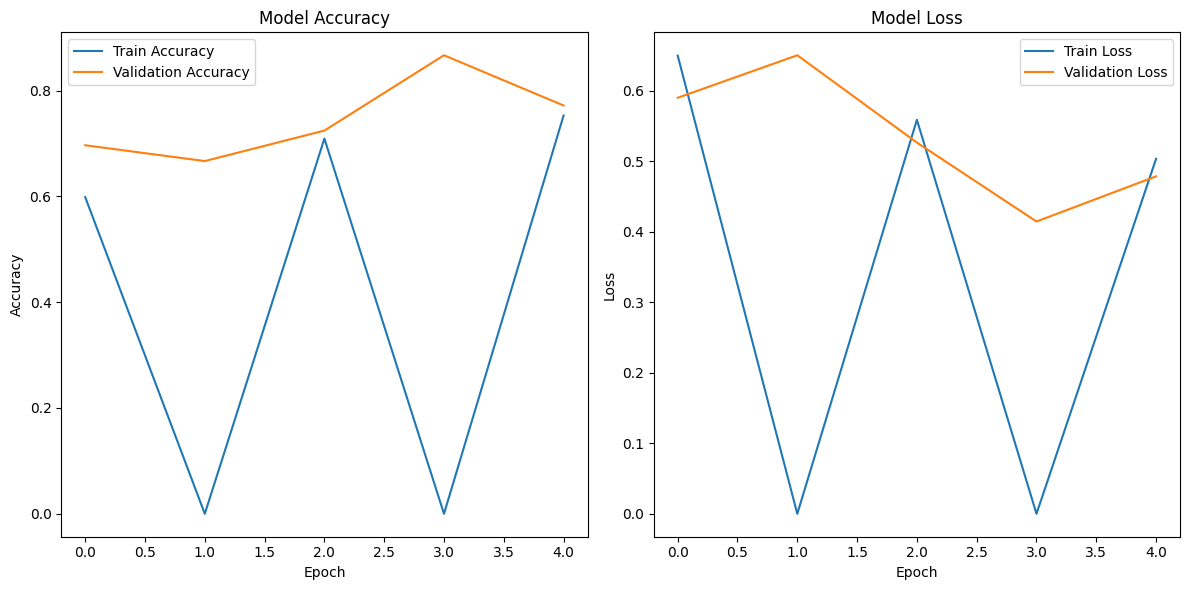

In [ ]:

# Train the model and capture the history
history = classifier.fit(
    train,
    steps_per_epoch=train.samples // train.batch_size,
    epochs=5,
    validation_data=test,
    validation_steps=test.samples // test.batch_size
)

# Plotting training & validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Modelo de clasificacion CNN

classifier = Sequential()


## convolucion #1
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu', padding='same'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))

## convolucion #2
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))

## convolucion #3

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))

## convolucion #4

classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))


classifier.add(Flatten())  ### Aplanamos los valores

classifier.add(Dense(units = 600, activation = 'relu'))  ## utilizamos 600 neuronas

classifier.add(Dropout(0.5))
classifier.add(Dense(units = 1, activation = 'sigmoid')) ## capa final sigmoid con una sola neurona

sgd = SGD(lr=0.1)
classifier.compile(optimizer = Adam(lr=0.0003), loss = 'binary_crossentropy', metrics = ['accuracy'])


classifier.fit(train,
#steps_per_epoch = 8000,
epochs = 25,
validation_data = test,
shuffle = True
#validation_steps = 2000
)

Epoch 1/25
251/251 [==============================] - 2718s 11s/step - loss: 0.6419 - accuracy: 0.6107 - val_loss: 0.5777 - val_accuracy: 0.6965
Epoch 2/25
251/251 [==============================] - 42s 167ms/step - loss: 0.5383 - accuracy: 0.7290 - val_loss: 0.5164 - val_accuracy: 0.7509
Epoch 3/25
251/251 [==============================] - 42s 166ms/step - loss: 0.4860 - accuracy: 0.7660 - val_loss: 0.5023 - val_accuracy: 0.7573
Epoch 4/25
251/251 [==============================] - 41s 165ms/step - loss: 0.4387 - accuracy: 0.7975 - val_loss: 0.4707 - val_accuracy: 0.7830
Epoch 5/25
251/251 [==============================] - 41s 165ms/step - loss: 0.3964 - accuracy: 0.8202 - val_loss: 0.4074 - val_accuracy: 0.8161
Epoch 6/25
251/251 [==============================] - 41s 164ms/step - loss: 0.3605 - accuracy: 0.8412 - val_loss: 0.3914 - val_accuracy: 0.8260
Epoch 7/25
251/251 [==============================] - 41s 164ms/step - loss: 0.3051 - accuracy: 0.8700 - val_loss: 0.3562 - val_ac

## Transfer learning
Three models — VGG16, EfficientNet, and ResNet50 — are solid choices, they have different strengths. Here's a comparison:

- VGG16:

Pros: Simple and easy to use. Good baseline for smaller datasets.
Cons: Large number of parameters, which can lead to slower training and high memory usage. It is less efficient than newer models like EfficientNet or ResNet.
Best for: Simpler problems or when you need a straightforward approach.

- EfficientNet:

Pros: Known for being more efficient and achieving state-of-the-art performance with fewer parameters. It's designed to be computationally efficient and can scale well for different problems.
Cons: Slightly more complex than VGG16, but it is still quite efficient.
Best for: Faster training with fewer resources and high accuracy.

- ResNet50:

Pros: Very popular in transfer learning tasks. It’s very deep, yet its residual blocks allow for better learning of deep models. It has shown excellent performance on many tasks, including classification.
Cons: Slightly more computationally intensive than VGG16, but generally faster than VGG16 in practice.
Best for: Deep learning tasks requiring very good performance.

Let's Do Efficient Net

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


Load the pre-trained EfficientNet model without the top layer (to replace it with your own classifier):

In [ ]:
# Load the EfficientNetB0 model pre-trained on ImageNet, excluding the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the pre-trained model
base_model.trainable = False

# Build your own classifier on top
x = base_model.output
x = Flatten()(x)
x = Dense(600, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base model and the new classifier
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])


Data Preprocessing with ImageDataGenerator:

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training and test data
train = datagen.flow_from_directory(
    directory='/content/drive/My Drive/Classroom/Topicos_Avanzados_IA/dataset_dogs_vs_cats/train',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)

test = datagen.flow_from_directory(
    directory='/content/drive/My Drive/Classroom/Topicos_Avanzados_IA/dataset_dogs_vs_cats/test',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)


Train and Plot the model:

In [ ]:
# Train the model and capture the history
history = model.fit(
    train,
    steps_per_epoch=train.samples // train.batch_size,
    epochs=3,
    validation_data=test,
    validation_steps=test.samples // test.batch_size
)

# Plotting training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()


Switching Models:

If you want to use ResNet50 or VGG16 instead, simply replace EfficientNetB0 with ResNet50 or VGG16, and ensure that you use the correct input shape.

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
